<a href="https://colab.research.google.com/github/razzzeeev/Assignemnt/blob/main/Q02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [4]:
%load_ext autoreload
%autoreload 

import pandas as pd
import sklearn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Questions

## Data visualisation

* Use standard visualisation techniques to understand the ml.csv dataset

In [10]:
dataset=pd.read_csv("ml.csv")
dataset.head()   #print first 5 rows



,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
0,0.059856,-0.613184,2.322512,0.564453,0.564453,-1.537281,0.651346,1.241025,-0.526630,-0.321259,-4.535690,4.172215,0.896425,-2.137238,-0.524706,-0.182015,-3.541982,0.627917,2.322512,1.209449,0
1,-0.583660,-1.716858,-0.536196,1.132689,1.132689,3.363117,-0.344752,-6.147045,0.387888,0.225844,7.066254,-3.368602,1.239733,-2.328327,-2.038456,0.152063,1.474279,0.085711,-0.536196,-0.910968,0
2,0.632819,0.754014,0.548169,-3.061347,-3.061347,1.723483,-1.107925,0.843077,-1.004112,1.006515,4.435341,2.350002,-0.509790,1.014956,-0.133556,-1.280977,2.352125,-0.905258,0.548169,-0.424693,1
3,0.666025,-1.231859,-0.615159,-0.096564,-0.096564,-2.362081,-0.926052,-3.724770,-1.291843,3.339638,-1.425629,-1.435194,0.822062,-0.863488,0.944573,-0.657542,0.061348,2.600972,-0.615159,1.216673,0
4,0.059144,-0.159858,1.185429,1.675701,1.675701,-2.002485,0.718597,1.630679,0.734710,0.517748,-5.180607,3.498812,-0.397651,1.153317,-0.866617,1.498591,0.581942,-2.246284,1.185429,3.011774,1


In [30]:
dataset.tail()   #print last 5 row

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
995,-0.089335,-0.707953,-1.601152,3.344799,3.344799,-2.138397,-0.535857,0.765278,-0.358198,-1.660355,-4.766465,-6.017899,-0.324322,2.751492,2.023106,-0.070720,-0.159242,0.070483,-1.601152,-1.010918,0
996,0.796263,-0.544059,1.923068,-1.213895,-1.213895,-4.863790,0.970886,1.883344,0.936753,2.859356,-3.200602,2.827478,0.166317,1.350942,0.878975,-0.583111,-1.696265,1.597607,1.923068,-2.144857,0
997,0.006266,0.677183,1.111781,-0.392983,-0.392983,0.757790,-0.678159,2.550552,1.084215,2.059497,3.803106,7.076757,-1.113223,-1.856685,-0.884620,0.804411,-0.729983,-4.613538,1.111781,-1.170473,1
998,-0.598648,-1.018163,-0.892881,3.886200,3.886200,0.531769,1.616102,-3.609442,0.030014,-3.064055,-4.026865,-6.795032,-0.222822,0.350625,2.252174,-0.596400,-0.230354,-0.547367,-0.892881,2.406903,1
999,-0.731184,-1.105933,2.592094,0.478146,0.478146,-2.476153,0.023083,1.984368,0.278978,1.658869,-3.658256,5.387175,-1.519105,2.276860,-3.504439,-2.080188,2.059550,-0.875185,2.592094,1.786082,1


In [11]:
dataset.shape  #print shape(no. of rows and columns) of the data

(1000, 21)

In [12]:
dataset.describe() #view some basic statistical details like percentile, mean, std etc

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.033344,-0.023231,-0.395385,0.006166,0.006166,0.239333,0.030522,-0.421310,0.047228,0.171481,0.727083,-0.630073,0.015511,-0.395275,0.063600,0.014615,0.209988,0.387723,-0.395385,-0.539941,0.499000
std,1.013009,1.029640,2.009109,1.978090,1.978090,2.107363,1.002618,2.202802,1.040565,1.988208,3.897085,3.731091,0.992347,1.981376,2.138400,0.972541,2.223097,2.009710,2.009109,1.990348,0.500249
min,-3.330786,-4.019121,-5.702446,-7.031495,-7.031495,-6.624661,-2.772839,-7.695420,-3.757435,-6.037023,-12.200620,-16.024787,-3.387235,-9.819943,-6.924821,-4.064603,-8.138330,-5.856985,-5.702446,-5.949569,0.000000
25%,-0.692925,-0.708283,-1.670074,-1.375619,-1.375619,-1.144063,-0.707877,-1.949425,-0.674816,-1.113896,-1.677895,-2.940827,-0.664057,-1.830263,-1.432148,-0.590170,-1.124045,-0.959849,-1.670074,-1.924088,0.000000
50%,-0.021251,0.005202,-0.554880,-0.072571,-0.072571,0.290362,0.053892,-0.421972,0.051405,0.204821,0.667150,-0.428282,0.031516,-0.392649,0.091388,0.047038,0.321612,0.299314,-0.554880,-0.475665,0.000000
75%,0.617568,0.668781,0.823475,1.400314,1.400314,1.756946,0.730804,1.050379,0.806826,1.426494,3.434756,1.980699,0.726661,0.847422,1.462370,0.699456,1.706936,1.759240,0.823475,0.796114,1.000000
max,3.513676,3.229829,5.982550,6.484561,6.484561,6.735077,3.103384,5.744023,3.556458,7.215038,13.699979,10.127276,3.777490,5.151350,6.871201,3.384539,8.199991,7.310601,5.982550,5.164638,1.000000


In [16]:
dataset.info()   # concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      1000 non-null   float64
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   x3      1000 non-null   float64
 4   x4      1000 non-null   float64
 5   x5      1000 non-null   float64
 6   x6      1000 non-null   float64
 7   x7      1000 non-null   float64
 8   x8      1000 non-null   float64
 9   x9      1000 non-null   float64
 10  x10     1000 non-null   float64
 11  x11     1000 non-null   float64
 12  x12     1000 non-null   float64
 13  x13     1000 non-null   float64
 14  x14     1000 non-null   float64
 15  x15     1000 non-null   float64
 16  x16     1000 non-null   float64
 17  x17     1000 non-null   float64
 18  x18     1000 non-null   float64
 19  x19     1000 non-null   float64
 20  y       1000 non-null   int64  
dtypes: float64(20), int64(1)
memory usage:

In [15]:
dataset.isnull().sum() #checking the null values in the dataset

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
y      0
dtype: int64

There is no null values.

## Machine learning

* Establish a reliable roc_auc metric for this data set using a cross validation technique to predict y from x using a random forest.


In [17]:
#importing the required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
X=dataset[['x0','x1', 'x2', 'x3', 'x4', 'x5', 'x6' , 'x7' ,'x8', 'x9', 'x10','x11','x12','x13','x14','x15','x16','x17', 'x18', 'x19']]  # Features
y=dataset['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #splitting the dataset into train and test

clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("roc_auc_score:",roc_auc_score(y_test, y_pred, average=None))


 

roc_auc_score: 0.7780677104241939


## Bonus

* How would you verify the model has has established which features are important and those that are not.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [18]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [20]:
import pandas as pd

feature_imp = pd.Series(clf.feature_importances_,index=feature_names)
feature_imp

feature 0     0.034168
feature 1     0.030184
feature 2     0.083185
feature 3     0.042573
feature 4     0.045884
feature 5     0.049100
feature 6     0.032360
feature 7     0.095314
feature 8     0.026045
feature 9     0.082267
feature 10    0.062371
feature 11    0.037466
feature 12    0.025625
feature 13    0.049544
feature 14    0.039213
feature 15    0.030017
feature 16    0.058422
feature 17    0.047440
feature 18    0.092105
feature 19    0.036714
dtype: float64

No handles with labels found to put in legend.


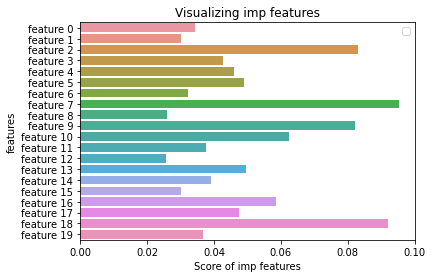

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score of imp features')
plt.ylabel('features')
plt.title("Visualizing imp features")
plt.legend()
plt.show()

**Building model only on important Features**

In [22]:
from sklearn.model_selection import train_test_split
X=dataset[['x2', 'x3', 'x4', 'x5' , 'x7', 'x9', 'x10','x11','x13','x14','x16','x17', 'x18']]  
y=dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


print("roc_auc_score:",roc_auc_score(y_test, y_pred, average=None))

roc_auc_score: 0.8433333333333333


After Removing less important Features roc_auc_score increased to 0.8433333333333333

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
